<a href="https://colab.research.google.com/github/Isaraq/ML-Labs/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [32]:
df =pd.read_csv('vgsales.csv')

In [33]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [34]:
print(df.isna())

        Rank   Name  Platform   Year  Genre  Publisher  NA_Sales  EU_Sales  \
0      False  False     False  False  False      False     False     False   
1      False  False     False  False  False      False     False     False   
2      False  False     False  False  False      False     False     False   
3      False  False     False  False  False      False     False     False   
4      False  False     False  False  False      False     False     False   
...      ...    ...       ...    ...    ...        ...       ...       ...   
16593  False  False     False  False  False      False     False     False   
16594  False  False     False  False  False      False     False     False   
16595  False  False     False  False  False      False     False     False   
16596  False  False     False  False  False      False     False     False   
16597  False  False     False  False  False      False     False     False   

       JP_Sales  Other_Sales  Global_Sales  
0         False   

In [35]:
print(df.isna().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [36]:
df[df.isna().all(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [37]:
df.duplicated()[df.duplicated()==True]

,0


In [38]:
df.columns.duplicated().any()

np.False_

In [39]:
df.shape

(16598, 11)

In [40]:
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [41]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [42]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


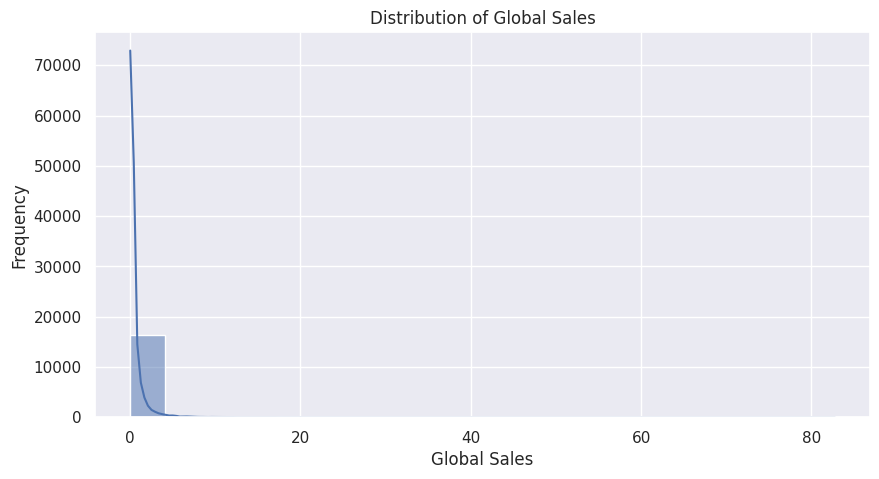

In [66]:
plt.figure(figsize=(10,5))
sns.histplot(df['Global_Sales'], bins=20, kde=True)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales")
plt.ylabel("Frequency")
plt.show()

The distribution is positively skewed. Most games have low sales while a few games have extremely high sales.

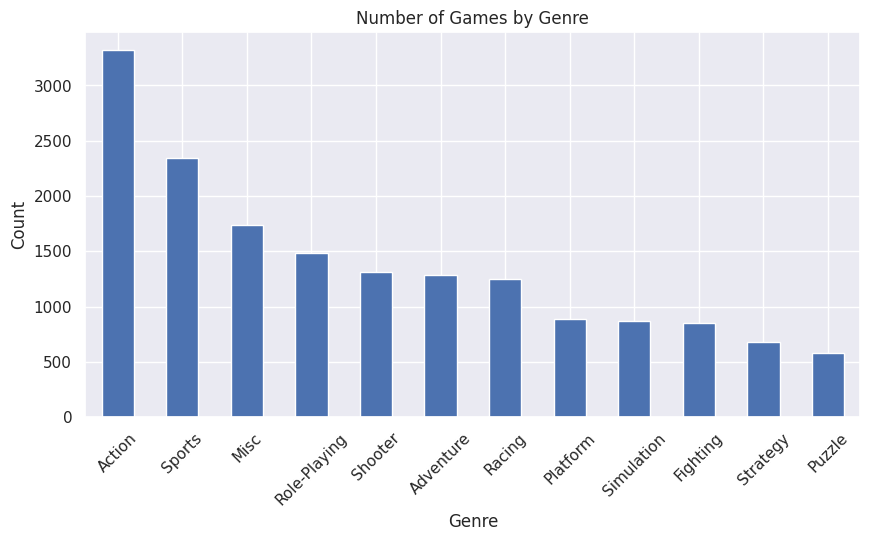

In [67]:
plt.figure(figsize=(10,5))
df['Genre'].value_counts().plot(kind='bar')
plt.title("Number of Games by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Action genre has the highest number of games compared to other genres.

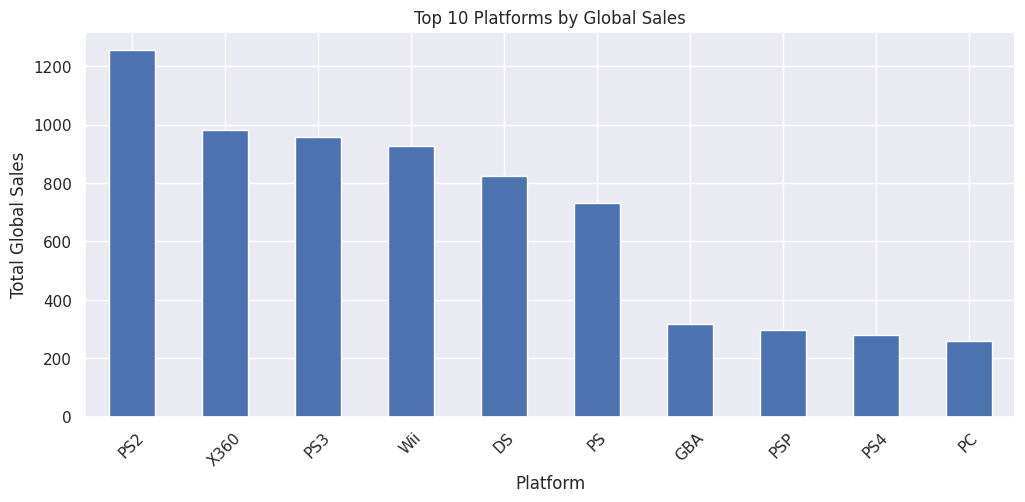

In [68]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
platform_sales.plot(kind='bar')
plt.title("Top 10 Platforms by Global Sales")
plt.xlabel("Platform")
plt.ylabel("Total Global Sales")
plt.xticks(rotation=45)
plt.show()

The platform with the highest total global sales dominates the market significantly.

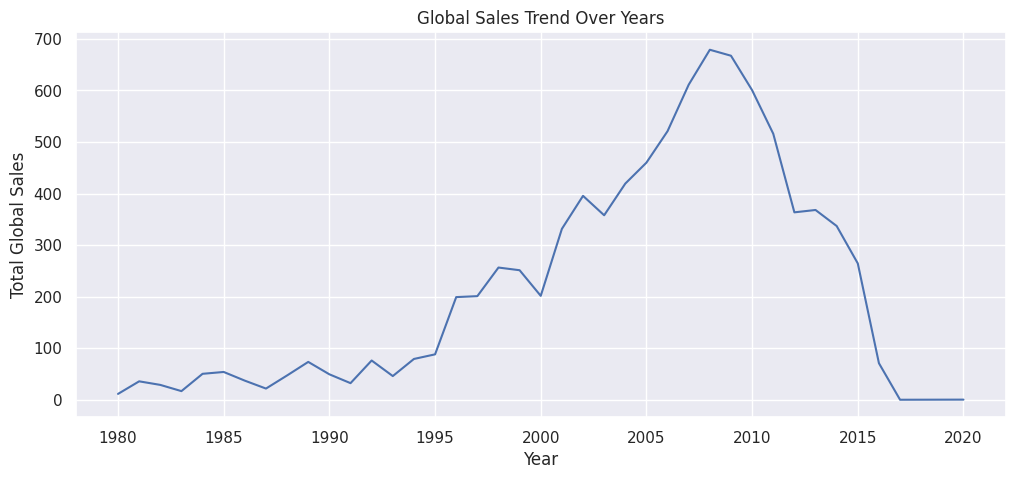

In [70]:
year_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12,5))
year_sales.plot()
plt.title("Global Sales Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Total Global Sales")
plt.show()

Global sales increased steadily until around 2008–2009, where they peaked. After that, sales show a declining trend.